# Global Overview

<b>Name:</b> Princewill Eneh

<b>Date: </b> June 12, 2018

# Step 1: Define the Problem

<b>Project Summary:</b>
What Carl is looking for, is a sample of the Machine learning algorithm that you plan to implement/would implement given the data. We would like to know what Daugherty is able to produce and the inner workings of how you would feed back the learnings into this algorithm. Obviously, we aren’t able to write this back to the system currently to change the bid etc, but we want to know how the algorithm you are using would pick up on the changes and adjust and see what the build would be looking at.
 
For this we have two targets:<br>
what would your Algorithm be to change bids to increase ROI?<br>
What would your algorithm be to change bids to increase PCOGS/Sales.<br>
 
We are targeting presentations for this on Friday around mid-day. We are looking at roughly 30 min for the presentation.

# Step 2: Gather the Data

The dataset is also given to us on a golden plater with test and train data at 

In [4]:
# data Dictionary
pd.set_option('display.max_colwidth', -1)
dictionary = pd.read_csv('../Global Overview /Resource/Data Dictionary.csv')

In [13]:
dictionary.head(50)

,Data Element,Description,AMS Campaign,COGS and Units 4-1-2018,Keyword AMS Table,Keyword Bid All
0,ad_id,"Product ad id. Unique id for a particular product (ASIN). A campaign can advertise multiple product ads, and a product ad can use multiple keywords.",NaN,NaN,x,NaN
1,ams_campaign_id (campaign_id),same as campaign_id,NaN,NaN,NaN,x
2,ams_keyword_id,Unique ID assigned to the keyword entry by Amazon at creation,NaN,NaN,NaN,x
3,ams_profile_id (profile_id),Unique ID assigned to the profile by Amazon at creation. Each profile represents a brand. Each vendor can have one or more profiles (brands).,NaN,NaN,NaN,x
4,asin,Amazon-assigned identification number for a product. A UPC may have multiple ASINs assigned. (Amazon Standard Identification Number),NaN,x,x,NaN
5,asin_name,Description of the product,NaN,x,NaN,NaN
6,attributed_conversions_1d,Number of orders attributed to the particular keyword instance within one day of clicking on the ad. Includes both same sku conversions and halo conversions (sales of another product from the same vendor),NaN,NaN,x,NaN
7,attributed_conversions_1d_same_sku,Number of orders attributed to the particular keyword instance within one day of clicking on the ad. Includes only same sku conversions,NaN,NaN,x,NaN
8,attributed_conversions_30d,Number of orders attributed to the particular keyword instance within 30 days of clicking on the ad. Includes both same sku conversions and halo conversions (sales of another product from the same vendor),NaN,NaN,x,NaN
9,attributed_conversions_30d_same_sku,Number of orders attributed to the particular keyword instance within 30 days of clicking on the ad. Includes only same sku conversions,NaN,NaN,x,NaN


# Step 3: Prepare Data for Analysis

## 3.1 Import Libraries
The following code is written in Python 3.x. Libraries provide pre-written functionality to perform necessary tasks. The idea is why write ten lines of code, when you can write one line.

In [2]:
# load packages
import sys
import pandas as pd
import matplotlib
import numpy as np
import scipy as sp
import gc
import IPython
from IPython import display
import sklearn

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

from subprocess import check_output
print(check_output(["ls", "../Global Overview /input"]).decode("utf8"))

AMS Campaign.csv
COGS and Units 4-1-2018.csv
Campaign test file.csv
Keyword AMS Table.csv
Keyword Bid All.csv



## 3.2 Load Data Modeling Libraries

We will use the popular *scikit-learn* library to develop our machine learning algorithms. In *sklearn,* algorithms are called Estimators and implemented in their own classes. For data visualization, we will use the *matplotlib* and *seaborn* library. Below are common classes to load.

In [66]:
# Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier, XGBRegressor

# Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cross_validation import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score


# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.tools.plotting import scatter_matrix

# Configure Visualization Defaults
#%matplotlib inline = show plots in Jupyter Notebook browser
%matplotlib inline
mpl.style.use('ggplot')
#sns.set(context='talk', style='dark', palette='pastel', font='sans-serif', font_scale=1, color_codes=False, rc=None)
sns.set_style('white')
pylab.rcParams['figure.figsize'] = 16, 8

## 3.3 Load Data

This is the meet and greet step. Get to know your data by first name and learn a little bit about it. What does it look like (datatype and values), what makes it tick (independent/feature variables(s)), what's its goals in life (dependent/target variable(s)). Think of it like a first date, before you jump in and start poking it in the bedroom.


In [5]:
# Load data into a pandas Dataframe
AMS_Campaign = pd.read_csv('../Global Overview /input/AMS Campaign.csv')
COGSandUnits = pd.read_csv('../Global Overview /input/COGS and Units 4-1-2018.csv')
Keyword_AMS= pd.read_csv('../Global Overview /input/Keyword AMS Table.csv')
Keyword_Bid = pd.read_csv('../Global Overview /input/Keyword Bid All.csv')

In [164]:
Campaign = pd.read_csv('../Global Overview /input/Campaign test file 2018-06-14-0900 EO.csv')

## 3.4 Data Profiling 

#### 3.4.1 Data Summary

##### Original 4 Tables

In [6]:
# Return the first 5 rows from the dataset
AMS_Campaign.head()

,campaign_id,profile_id,pull_date,report_date,name,campaign_type,targeting_type,state,daily_budget,premium_bid_adjustment,start_date,end_date,creation_date,last_updated_date,serving_status
0,77495660917800,1088518656334420,2018-05-22 11:56:58.625,2018-03-24,Beano Sponsored 11/29/2017,sponsoredProducts,auto,enabled,41,False,2017-11-29,NaN,2017-11-29 11:08:41.0,2018-05-07 08:41:52.0,CAMPAIGN_STATUS_ENABLED
1,244767888765334,1034543032463850,2018-05-22 11:56:58.626,2018-03-24,Douche Always On Sponsored Product,sponsoredProducts,manual,paused,30,True,2016-09-11,NaN,2016-09-11 17:37:14.0,2018-05-04 03:33:12.0,CAMPAIGN_PAUSED
2,94954182625016,2287986594556105,2018-05-22 11:56:58.626,2018-03-24,Sponsored Products_Auto (1),sponsoredProducts,auto,enabled,20,False,2017-04-11,2017-04-29,2017-04-11 19:46:29.0,2018-05-04 13:48:22.0,ENDED
3,67444959869945,1974480082445026,2018-05-22 11:56:58.626,2018-03-24,Natural- B000P16ZXK- Category,sponsoredProducts,manual,enabled,40,True,2018-02-15,NaN,2018-02-15 13:05:07.0,2018-05-22 10:16:34.0,CAMPAIGN_OUT_OF_BUDGET
4,217460110797457,4045444946212948,2018-05-22 11:56:58.627,2018-03-24,Mederma 11/04/2015 - AG Facial Cleanser,sponsoredProducts,manual,archived,5,False,2015-11-04,NaN,2015-11-04 11:40:27.0,2016-11-17 20:01:08.0,CAMPAIGN_ARCHIVED


In [19]:
AMS_Campaign.shape

(31478, 15)

In [18]:
AMS_Campaign.campaign_id.value_counts().count()

1574

In [5]:
COGSandUnits.head()

,vendor_id,vendor_name,brand_name,transaction_date,asin,asin_name,shipped_cogs,units_shipped
0,4MkBqejbgY,Prestige,Compound W,2018-05-12,B000052XPI,"Compound W Wart Remover, Maximum Strength, Fas...",NaN,NaN
1,ZgWIRZJOMj,AuraCacia,Frontier COOP,2018-05-05,B0000DHZY1,"Frontier Organic Vanilla Extract, 8 Ounce",0.0,0.0
2,ZgWIRZJOMj,AuraCacia,Frontier COOP,2018-04-14,B00016X7NA,"Aura Cacia Aromatherapy Mineral Bath, Tranquil...",303.0,54.0
3,ZgWIRZJOMj,AuraCacia,Frontier,2018-04-14,B00016XLHM,"Frontier Culinary Spices Garlic Granules, 2.7-...",0.0,0.0
4,wyWvTSevFA,Merz,Mederma,2018-04-21,B000052YOB,"Mederma Skin Care for Scars, 1.76 oz (50 g)",26826.0,1301.0


In [7]:
COGSandUnits.shape

(11722, 8)

In [9]:
COGSandUnits.asin.value_counts().count()

1990

In [6]:
Keyword_AMS.head()

,campaign_id,brand_name,state,serving_status,report_date,ad_id,sku,asin,impressions,clicks,...,attributed_sales_1d_same_sku,attributed_sales_1d,attributed_conversions_7d_same_sku,attributed_conversions_7d,attributed_sales_7d_same_sku,attributed_sales_7d,attributed_conversions_30d_same_sku,attributed_conversions_30d,attributed_sales_30d_same_sku,attributed_sales_30d
0,96979620995848,Prestige Brands,enabled,AD_STATUS_LIVE,2018-03-24,202518353498519,NaN,B011CXE8AQ,7745,16,...,18,18,4,4,24,24,4,4,24,24
1,125668883924904,Prestige Brands,enabled,AD_STATUS_LIVE,2018-03-24,150997205052866,NaN,B005LF0QZI,3866,16,...,66,66,5,5,66,66,6,6,78,78
2,145724376691125,Prestige Brands,enabled,AD_STATUS_LIVE,2018-03-24,273126583472196,NaN,B000GGFZ0I,1,0,...,0,0,0,0,0,0,0,0,0,0
3,96979620995848,Prestige Brands,enabled,AD_STATUS_LIVE,2018-03-24,140586916869651,NaN,B00HNKXSZO,772,16,...,41,41,5,5,41,41,6,6,46,46
4,96979620995848,Prestige Brands,enabled,AD_STATUS_LIVE,2018-03-24,193429584349060,NaN,B014REP4NM,4831,18,...,47,47,12,12,77,77,13,13,82,82


In [15]:
Keyword_AMS.shape

(13281, 23)

In [16]:
# Number of Campaigns
Keyword_AMS.campaign_id.value_counts().count()

457

In [7]:
Keyword_Bid.head()

,keyword_id,go_vendor_cd,ams_keyword_id,ams_profile_id,ams_campaign_id,report_date,keyword_text,match_type,bid,state,creation_date,last_updated_date,serving_status
0,3,UNKNOWN,405887721,304930194298830,244171512400776,2018-06-05,black womens hair,exact,1.0,enabled,2017-04-18 19:14:33.0,2017-04-18 19:14:33.0,ADVERTISER_PAYMENT_FAILURE
1,17,UNKNOWN,3069687209,947603712351524,76479360909882,2018-06-05,organic jerky,exact,3.0,archived,2016-08-03 16:34:29.0,2017-01-24 18:26:53.0,CAMPAIGN_ARCHIVED
2,25,4MkBqejbgY,8545228123,1034543032463850,244767888765334,2018-06-03,aveeno cleansing wash,broad,0.0,enabled,2016-09-11 22:37:15.0,2016-09-12 21:10:21.0,CAMPAIGN_PAUSED
3,41,UNKNOWN,10738823752,4302455167164633,220482731642542,2018-06-10,giant gummy worm,exact,2.0,enabled,2017-07-16 11:36:28.0,2017-07-16 11:36:28.0,ADVERTISER_PAYMENT_FAILURE
4,59,UNKNOWN,21806465237,4302455167164633,248435499725770,2018-06-10,gummi,exact,2.0,enabled,2017-07-16 12:01:04.0,2017-07-16 12:01:04.0,ADVERTISER_PAYMENT_FAILURE


In [ ]:
# Generates descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution
train.describe()

In [ ]:
# Return the dtypes for the columns in the dataset
train.dtypes

##### Single Merged Table

In [72]:
Campaign.head()

,Budget_campaign_id,Budget_report_date,Budget_campaign_status,Daily_budget_amount,Bid_campaign_id,Bid_report_date,Total_bid_amount,AMS_campaign_id,AMS_report_date,Sum_impressions,...,Sum_attributed_sales_1d_same_sku,Sum_attributed_sales_1d,Sum_attributed_conversions_7d_same_sku,Sum_attributed_conversions_7d,Sum_attributed_sales_7d_same_sku,Sum_attributed_sales_7d,Sum_attributed_conversions_30d_same_sku,Sum_attributed_conversions_30d,Sum_attributed_sales_30d_same_sku,Sum_attributed_sales_30d
0,1.674300e+11,6/4/2018,ENDED,6,1.674300e+11,6/4/2018,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.674300e+11,6/5/2018,ENDED,15,1.674300e+11,6/5/2018,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.674300e+11,6/6/2018,ENDED,23,1.674300e+11,6/6/2018,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.674300e+11,6/10/2018,ENDED,16,1.674300e+11,6/10/2018,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.211150e+11,3/24/2018,CAMPAIGN_PAUSED,30,3.211150e+11,3/24/2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [78]:
#Shape of Campaign Table
Campaign.shape

(15569, 24)

#### 3.4.2 Merging

In [10]:
#Fact Tables
# Combining CogAndUnits & Keyword AMS on asin
FactTables = pd.merge(COGSandUnits,Keyword_AMS , how='left', on=['asin'])

In [16]:
FactTables.sample(5)

,vendor_id,vendor_name,brand_name_x,transaction_date,asin,asin_name,shipped_cogs,units_shipped,campaign_id,brand_name_y,...,attributed_sales_1d_same_sku,attributed_sales_1d,attributed_conversions_7d_same_sku,attributed_conversions_7d,attributed_sales_7d_same_sku,attributed_sales_7d,attributed_conversions_30d_same_sku,attributed_conversions_30d,attributed_sales_30d_same_sku,attributed_sales_30d
56666,4MkBqejbgY,Prestige,"Emerson Healthcare LLC for Concepts in Health, Inc",2018-04-21,B00BRNCDD6,"Monistat Complete Therapy, 3 Ovule Inserts",5392.0,359.0,2.730351e+14,Monistat,...,178.0,178.0,12.0,12.0,196.0,196.0,13.0,13.0,208.0,208.0
22618,4MkBqejbgY,Prestige,Little Remedies,2018-05-12,B076HFNK8D,"Little Remedies Noses Saline Spray/Drops, 0.5 Ounce, 3 Count",373.0,62.0,1.759872e+14,Little Remedies,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36646,4MkBqejbgY,Prestige,Little Remedies,2018-05-05,B01BU6E7LK,"Little Remedies Probiotic Plus Electrolytes, 12 Count",153.0,18.0,2.591950e+14,Little Remedies,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
46792,CRa3oXVG0y,iHealth,Culturelle,2018-06-02,B001Y8EOHW,"i-Health Culturelle Probiotics for Kids, 30 Count",65063.2,3887.0,3.988563e+13,Culturelle,...,37.0,37.0,2.0,2.0,37.0,37.0,2.0,2.0,37.0,37.0
79878,4MkBqejbgY,Prestige,Boudreauxs,2018-04-14,B0794PMNL8,"Boudreaux's Butt Paste Diaper Rash Ointment Maximum Strength, 2 Ounce Tubes, 3 Tubes Total",626.0,58.0,1.421244e+14,Boudreaux's,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
FactTables.shape

(99096, 30)

In [23]:
pd.DataFrame(FactTables.columns)

,0
0,vendor_id
1,vendor_name
2,brand_name_x
3,transaction_date
4,asin
5,asin_name
6,shipped_cogs
7,units_shipped
8,campaign_id
9,brand_name_y


In [17]:
# Dimension Tables
# Combining AMSCampaign & Keyword_BId on

DimTables = pd.merge(AMS_Campaign, Keyword_Bid, how='left', left_on=[
                     'campaign_id', 'report_date'], right_on=['ams_campaign_id', 'report_date'])

In [19]:
DimTables.head(3)

,campaign_id,profile_id,pull_date,report_date,name,campaign_type,targeting_type,state_x,daily_budget,premium_bid_adjustment,...,ams_keyword_id,ams_profile_id,ams_campaign_id,keyword_text,match_type,bid,state_y,creation_date_y,last_updated_date_y,serving_status_y
0,77495660917800,1088518656334420,2018-05-22 11:56:58.625,2018-03-24,Beano Sponsored 11/29/2017,sponsoredProducts,auto,enabled,41,False,...,1.986179e+14,1.088519e+15,7.749566e+13,(_targeting_auto_),broad,NaN,enabled,2017-11-29 11:08:41.0,2017-11-29 11:08:41.0,TARGETING_CLAUSE_STATUS_LIVE
1,244767888765334,1034543032463850,2018-05-22 11:56:58.626,2018-03-24,Douche Always On Sponsored Product,sponsoredProducts,manual,paused,30,True,...,5.018313e+11,1.034543e+15,2.447679e+14,streem master shower douche,broad,0.0,enabled,2016-09-11 17:37:18.0,2016-09-12 16:10:21.0,CAMPAIGN_PAUSED
2,244767888765334,1034543032463850,2018-05-22 11:56:58.626,2018-03-24,Douche Always On Sponsored Product,sponsoredProducts,manual,paused,30,True,...,8.545228e+09,1.034543e+15,2.447679e+14,aveeno cleansing wash,broad,0.0,enabled,2016-09-11 17:37:15.0,2016-09-12 16:10:21.0,CAMPAIGN_PAUSED


In [20]:
DimTables.shape

(2677243, 27)

In [22]:
pd.DataFrame(DimTables.columns)

,0
0,campaign_id
1,profile_id
2,pull_date
3,report_date
4,name
5,campaign_type
6,targeting_type
7,state_x
8,daily_budget
9,premium_bid_adjustment


In [25]:
Common_cols = list(set(FactTables.columns) - set(DimTables.columns))

In [26]:
Common_cols

['cost',
 'attributed_sales_30d',
 'brand_name_y',
 'attributed_sales_1d',
 'vendor_name',
 'ad_id',
 'attributed_conversions_1d_same_sku',
 'shipped_cogs',
 'attributed_conversions_7d_same_sku',
 'attributed_conversions_30d',
 'brand_name_x',
 'vendor_id',
 'state',
 'asin',
 'attributed_conversions_7d',
 'units_shipped',
 'sku',
 'attributed_sales_1d_same_sku',
 'attributed_conversions_1d',
 'asin_name',
 'attributed_sales_30d_same_sku',
 'attributed_sales_7d',
 'serving_status',
 'clicks',
 'transaction_date',
 'attributed_sales_7d_same_sku',
 'impressions',
 'attributed_conversions_30d_same_sku']

In [67]:
Campaign = pd.read_csv('../Global Overview /input/Campaign test file 2018-06-14-0900 EO.csv')

In [68]:
Campaign.head(6)

,Budget_campaign_id,Budget_report_date,Budget_campaign_status,Daily_budget_amount,Bid_campaign_id,Bid_report_date,Total_bid_amount,AMS_campaign_id,AMS_report_date,Sum_impressions,...,Sum_attributed_sales_1d_same_sku,Sum_attributed_sales_1d,Sum_attributed_conversions_7d_same_sku,Sum_attributed_conversions_7d,Sum_attributed_sales_7d_same_sku,Sum_attributed_sales_7d,Sum_attributed_conversions_30d_same_sku,Sum_attributed_conversions_30d,Sum_attributed_sales_30d_same_sku,Sum_attributed_sales_30d
0,1.674300e+11,6/4/2018,ENDED,6,1.674300e+11,6/4/2018,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.674300e+11,6/5/2018,ENDED,15,1.674300e+11,6/5/2018,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.674300e+11,6/6/2018,ENDED,23,1.674300e+11,6/6/2018,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.674300e+11,6/10/2018,ENDED,16,1.674300e+11,6/10/2018,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.211150e+11,3/24/2018,CAMPAIGN_PAUSED,30,3.211150e+11,3/24/2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,3.211150e+11,5/23/2018,CAMPAIGN_PAUSED,30,3.211150e+11,5/23/2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
Campaign2.shape

(15569, 24)

In [40]:
Campaign.head()

,Budget_campaign_id,Budget_report_date,Budget_campaign_status,Daily_budget_amount,Bid_campaign_id,Bid_report_date,Total_bid_amount,AMS_campaign_id,AMS_report_date,Sum_impressions,...,Sum_attributed_sales_1d_same_sku,Sum_attributed_sales_1d,Sum_attributed_conversions_7d_same_sku,Sum_attributed_conversions_7d,Sum_attributed_sales_7d_same_sku,Sum_attributed_sales_7d,Sum_attributed_conversions_30d_same_sku,Sum_attributed_conversions_30d,Sum_attributed_sales_30d_same_sku,Sum_attributed_sales_30d
0,1.674300e+11,6/4/2018,ENDED,6,1.674300e+11,6/4/2018,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.674300e+11,6/5/2018,ENDED,15,1.674300e+11,6/5/2018,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.674300e+11,6/6/2018,ENDED,23,1.674300e+11,6/6/2018,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.674300e+11,6/10/2018,ENDED,16,1.674300e+11,6/10/2018,24.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3.211150e+11,3/24/2018,CAMPAIGN_PAUSED,30,3.211150e+11,3/24/2018,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
pd.DataFrame(Campaign.columns)

,0
0,Budget_campaign_id
1,Budget_report_date
2,Budget_campaign_status
3,Daily_budget_amount
4,Bid_campaign_id
5,Bid_report_date
6,Total_bid_amount
7,AMS_campaign_id
8,AMS_report_date
9,Sum_impressions


In [48]:
Campaign.dtypes

Budget_campaign_id                         float64
Budget_report_date                         object 
Budget_campaign_status                     object 
Daily_budget_amount                        int64  
Bid_campaign_id                            float64
Bid_report_date                            object 
Total_bid_amount                           float64
AMS_campaign_id                            float64
AMS_report_date                            object 
Sum_impressions                            float64
Sum_clicks                                 float64
Sum_cost                                   float64
Sum_attributed_conversions_1d_same_sku     float64
Sum_attributed_conversions_1d              float64
Sum_attributed_sales_1d_same_sku           float64
Sum_attributed_sales_1d                    float64
Sum_attributed_conversions_7d_same_sku     float64
Sum_attributed_conversions_7d              float64
Sum_attributed_sales_7d_same_sku           float64
Sum_attributed_sales_7d        

## 3.5 Correcting (Outliers)

Measure leverage and Influence(cook's Distance)//Note usually in regression analysis
A single observation that is substantially different from all other observations can make a large difference in the results of your regression analysis. If a single observation (or small group of observations) substantially changes your results, you would want to know about this and investigate further. There are three ways that an observation can be unusual.

**Outliers**: In linear regression, an outlier is an observation with large residual. In other words, it is an observation whose dependent-variable value is unusual given its values on the predictor variables. An outlier may indicate a sample peculiarity or may indicate a data entry error or other problem.

**Leverage**: An observation with an extreme value on a predictor variable is called a point with high leverage. Leverage is a measure of how far an observation deviates from the mean of that variable. These leverage points can have an effect on the estimate of regression coefficients.

**Influence**: An observation is said to be influential if removing the observation substantially changes the estimate of coefficients. Influence can be thought of as the product of leverage and outlierness.

The following is reference from stackexchange.

We need to understand three things:

leverage,
standardized residuals, and
Cook's distance.

In [ ]:
#standardizing data
target_scaled = StandardScaler().fit_transform(train['SalePrice'][:,np.newaxis]);
low_range = target_scaled[target_scaled[:,0].argsort()][:10]
high_range= target_scaled[target_scaled[:,0].argsort()][-10:]
print('outer range (low) of the distribution:')
print(low_range)
print('\nouter range (high) of the distribution:')
print(high_range)

In [ ]:
# An exploratory data analysis might need to be performed before this step.

# Deleting points
train.sort_values(by='<column>', ascending=False)[:2]
train = train.drop(train[df_train['Id'] == 1299].index)
train = train.drop(train[df_train['Id'] == 524].index)

##  3.6 Completing (Missing Data)

#### Checking for missing data

In [73]:
# Technique 1
# Check for Missing data
Campaign.isnull().any().any()

True

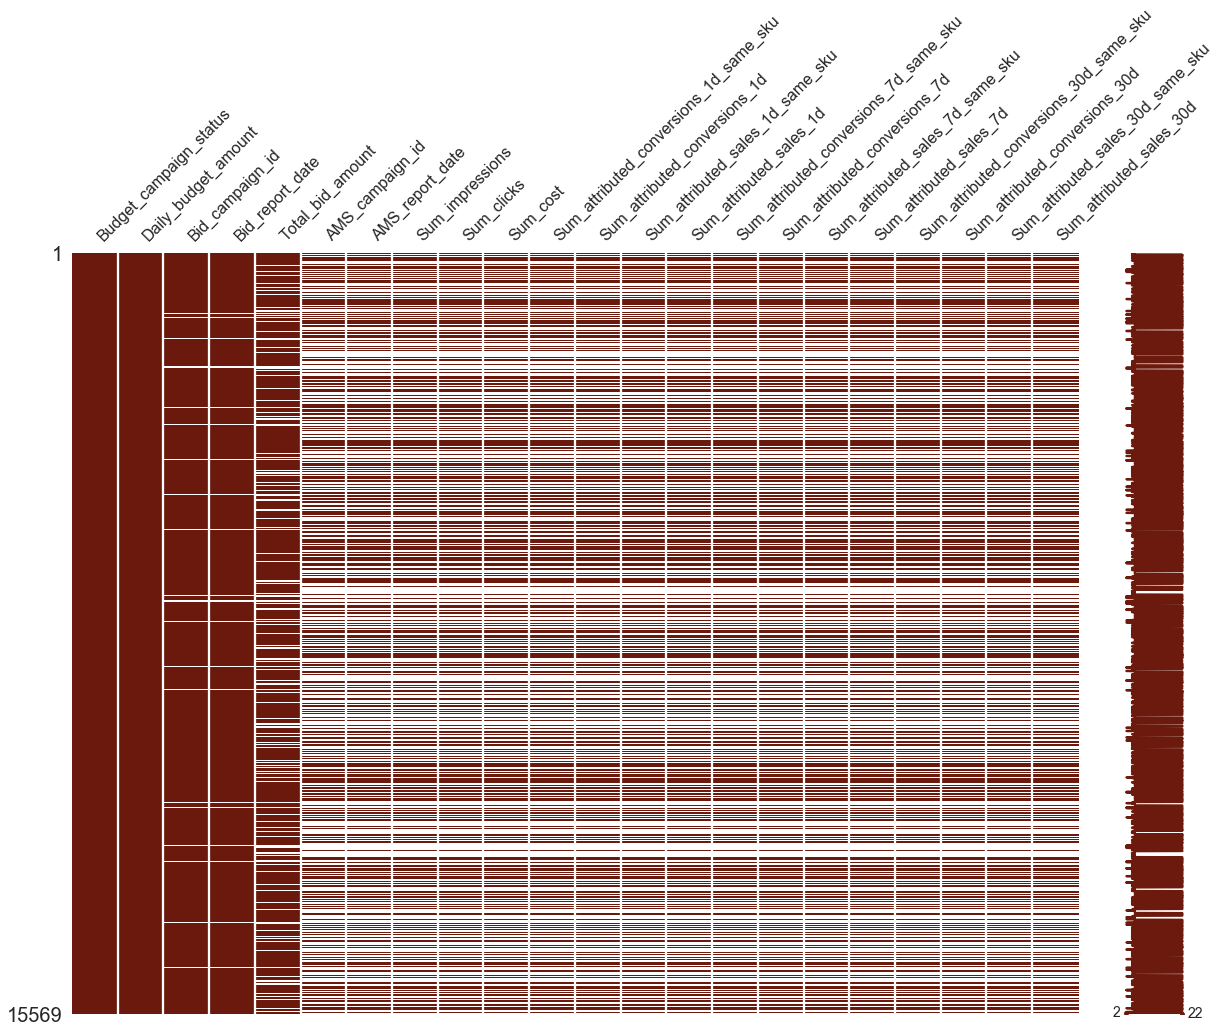

In [74]:
# Technique 2
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=Campaign.iloc[:, 2:39], figsize=(
    20, 14), color=(0.42, 0.1, 0.05))

In [79]:
# Technique 3
total = Campaign.isnull().sum().sort_values(ascending=False)
percent = (Campaign.isnull().sum() / Campaign.isnull().count()
           ).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
Sum_attributed_sales_30d,8351,0.536386
Sum_attributed_sales_1d_same_sku,8351,0.536386
AMS_campaign_id,8351,0.536386
AMS_report_date,8351,0.536386
Sum_impressions,8351,0.536386
Sum_clicks,8351,0.536386
Sum_attributed_sales_30d_same_sku,8351,0.536386
Sum_attributed_conversions_1d_same_sku,8351,0.536386
Sum_attributed_conversions_1d,8351,0.536386
Sum_cost,8351,0.536386


#### Imputing missing data

##### Drop All rows with NAN

In [165]:
Campaign.dropna(axis=0, inplace=True)

In [166]:
Campaign.shape

(6892, 24)

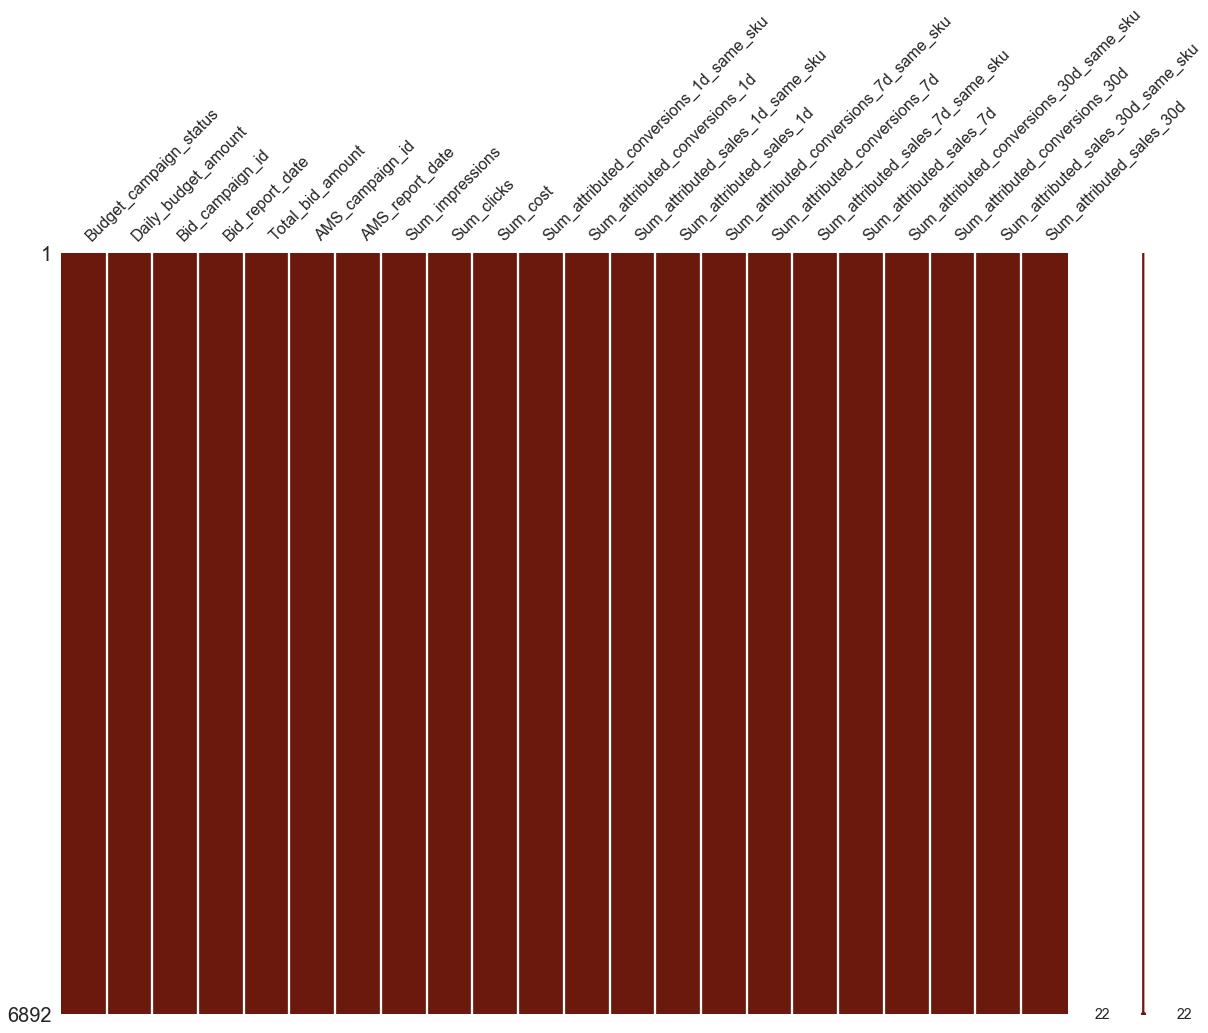

In [83]:
# Technique 2
import missingno as msno
# Nullity or missing values by columns
msno.matrix(df=Campaign.iloc[:, 2:39], figsize=(
    20, 14), color=(0.42, 0.1, 0.05))

# Step 4: Exploratory Data Analysis with Statistics

## 4.1 Visualizations

#### 4.1.1Target variable

In [89]:
#Setup
pal = ['#0A5F83','#0F7480','#28988A','#668B26', '#ABAB32']
sns.set_palette(sns.color_palette(pal))
sns.set(context='talk', style='ticks', 
        font='sans-serif', font_scale=1, color_codes=False, rc=None)

In [155]:
#applying log transformation to cost 
logtransformed_cost= np.log(Campaign['Sum_cost']+1)

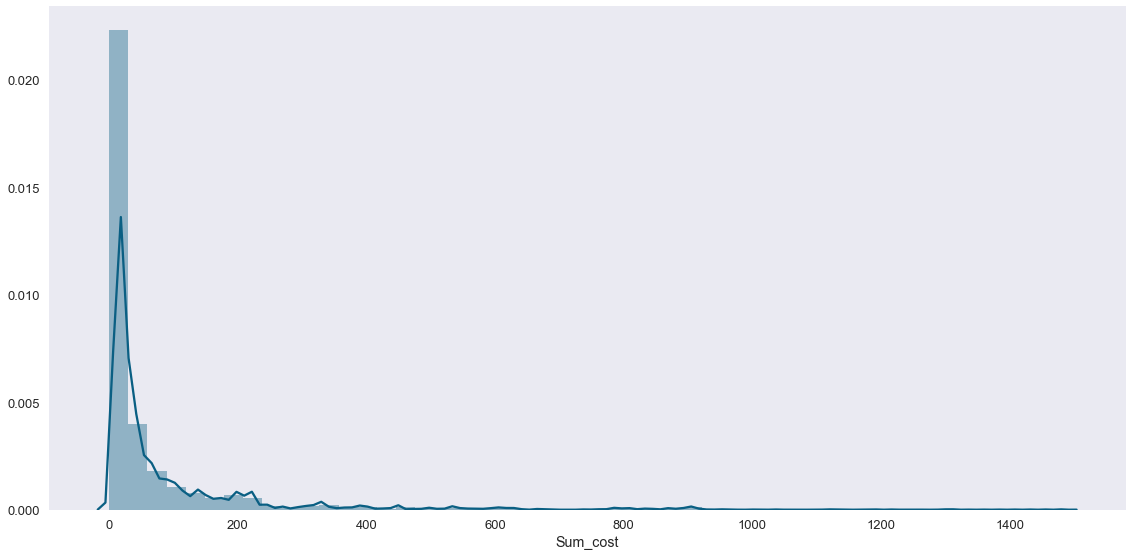

In [97]:
sns.set(context='talk', style='dark', palette= pal , font='sans-serif', font_scale=1,sns.set(context='talk', style='dark', palette= pal , font='sans-serif', font_scale=1, color_codes=False, rc=None)
f,ax = plt.subplots(figsize = (16,8))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(Campaign.Sum_cost)
sns.despine()
plt.tight_layout()
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(Campaign.Sum_cost)
sns.despine()
plt.tight_layout()

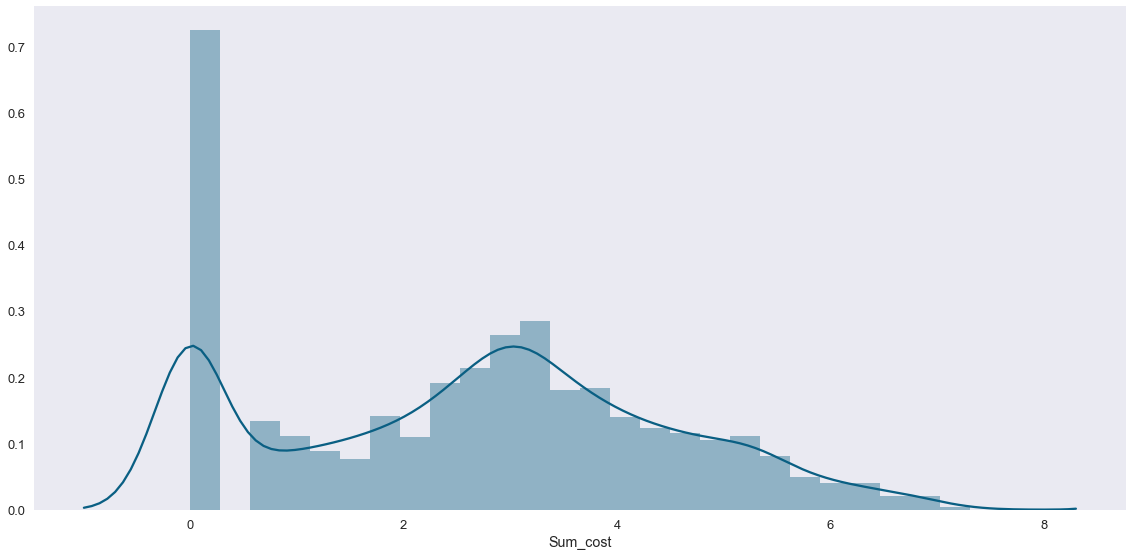

In [156]:
sns.set(context='talk', style='dark', palette= pal , font='sans-serif', font_scale=1, color_codes=False, rc=None)
f,ax = plt.subplots(figsize = (16,8))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(logtransformed_cost)
sns.despine()
plt.tight_layout()

In [157]:
#applying log transformation to cost 
logtransformed_clicks= np.log(Campaign['Sum_clicks']+1)

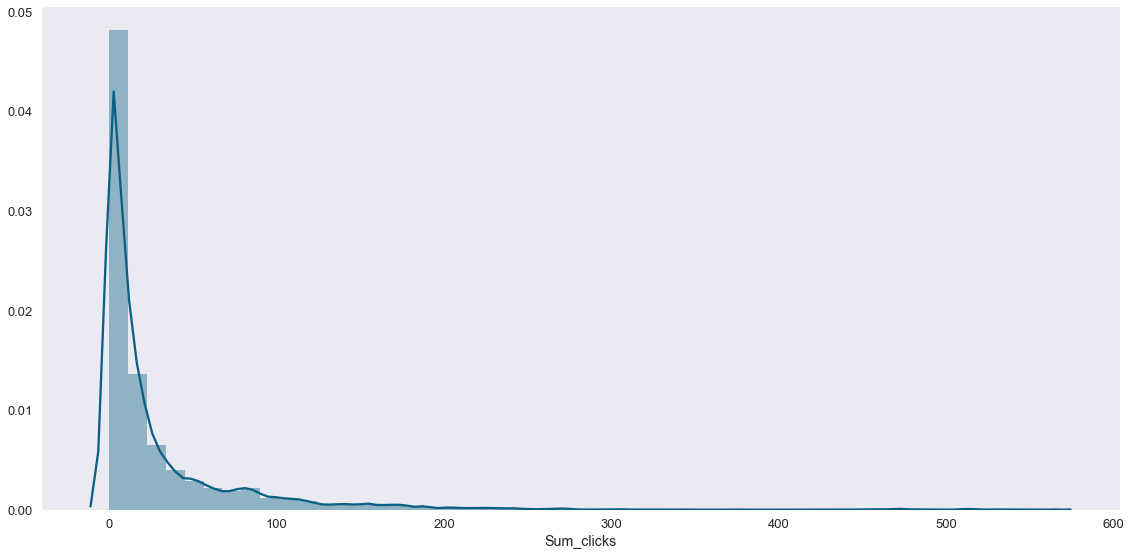

In [98]:
f,ax = plt.subplots(figsize = (16,8))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(Campaign.Sum_clicks)
sns.despine()
plt.tight_layout()

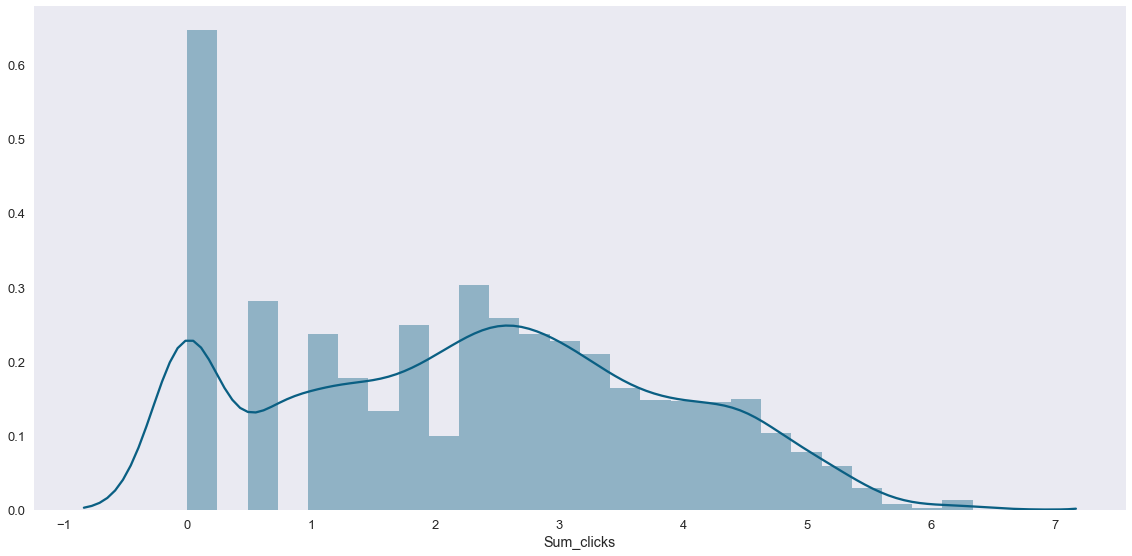

In [158]:
# Log Transformed
f,ax = plt.subplots(figsize = (16,8))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(logtransformed_clicks)
sns.despine()
plt.tight_layout()

In [159]:
#applying log transformation to cost 
logtransformed_sales= np.log(Campaign['Sum_attributed_sales_7d']+1)

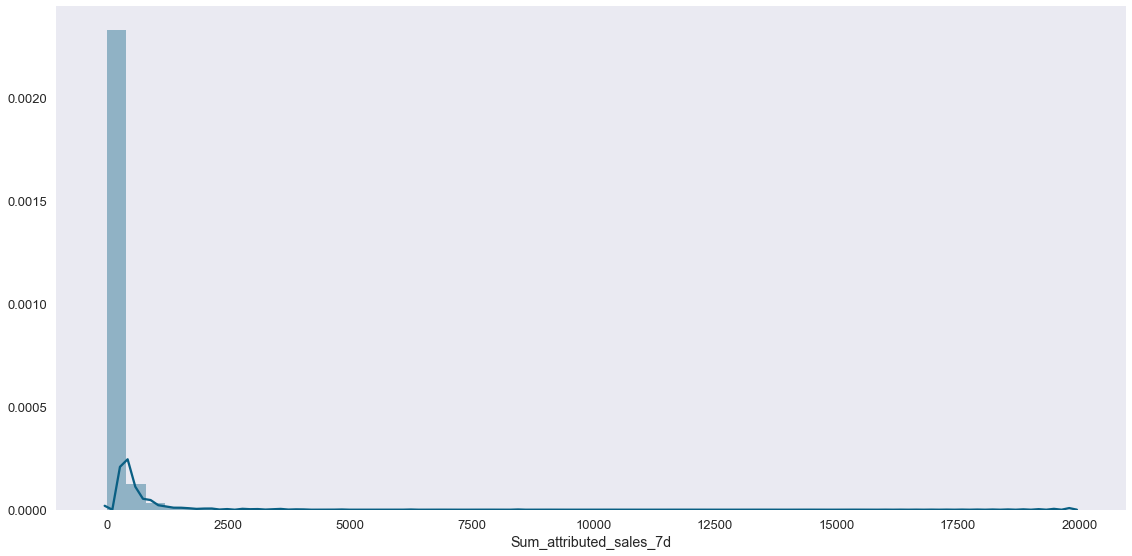

In [99]:
f,ax = plt.subplots(figsize = (16,8))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(Campaign.Sum_attributed_sales_7d)
sns.despine()
plt.tight_layout()

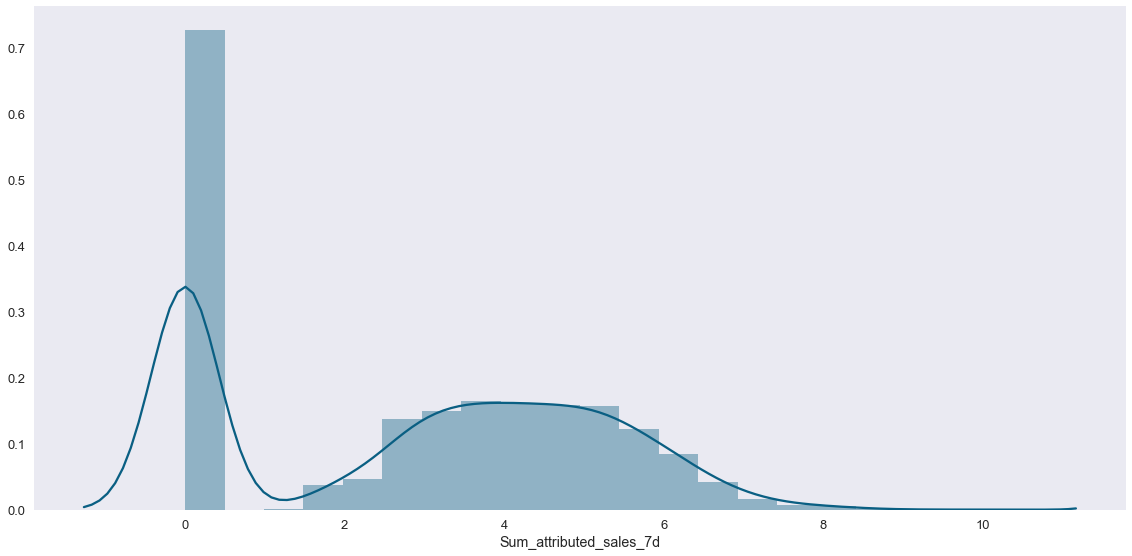

In [160]:
f,ax = plt.subplots(figsize = (16,8))
x = np.random.normal(size=100)
y = np.random.normal(size=100)
sns.distplot(logtransformed_sales)
sns.despine()
plt.tight_layout()

#### 4.1.2 Target vs Categorical variables

##### For Categorical Target

In [ ]:
# Graph individual features by survival
fig, saxis = plt.subplots(2, 3, figsize=(16, 12))

sns.barplot(x='<>', y='<target>', data=train, ax=saxis[0, 0])
sns.barplot(x='<>', y='<target>', order=[ 1, 2, 3], data=train, ax=saxis[0, 1])
sns.barplot(x='<>', y='<target>', order=[ 1, 0], data=train, ax=saxis[0, 2])

##### For Continous Target

In [ ]:
#box plot overallqual/saleprice
var = '<variable>'
data = pd.concat([train['<target>'], train[var]], axis=1) #Check
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxplot(x=var, y="<target>", data=data)
fig.axis(ymin=0, ymax=8000);

In [ ]:
#plot distributions of age of passengers who survived or did not survive
a = sns.FacetGrid( train, hue = '<target>', aspect=4 )
a.map(sns.kdeplot, '<Variable>', shade= True )
a.set(xlim=(0 , train['<Variable>'].max()))
a.add_legend()

#### 4.1.3 Target vs Numerical variables

##### For Categorical Target

In [ ]:
sns.boxplot(x="<target>", y="<variable>", hue="time", data=train);

##### For Continous Target

In [ ]:
# scatter plot 
var = '<variable>'
data = pd.concat([train['<target>'], train[var]], axis=1)
data.plot.scatter(x=var, y='<target>', ylim=(0, 8000))

#### 4.1.4 Correlation Plots

##### For Continous Target

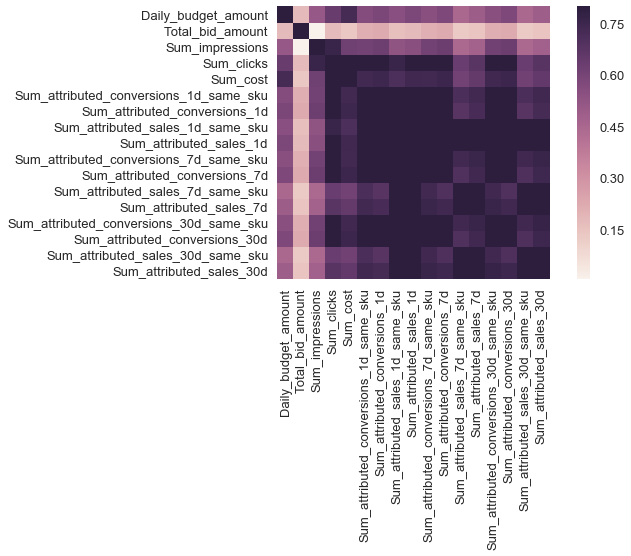

In [110]:
#correlation matrix with all variables
corrmat = Campaign.corr()
f, ax = plt.subplots(figsize=(11, 8))
sns.heatmap(corrmat, vmax=.8, square=True);
plt.tight_layout()

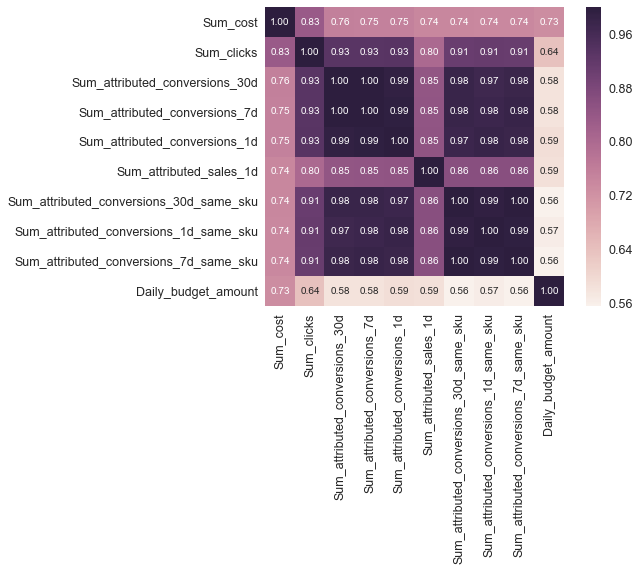

ValueError: max() arg is an empty sequence

In [112]:
#<target> correlation matrix zoomed in
k = 10 #number of variables for heatmap
cols = corrmat.nlargest(k, 'Sum_cost')['Sum_cost'].index
cm = np.corrcoef(Campaign[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()
plt.tight_layout()

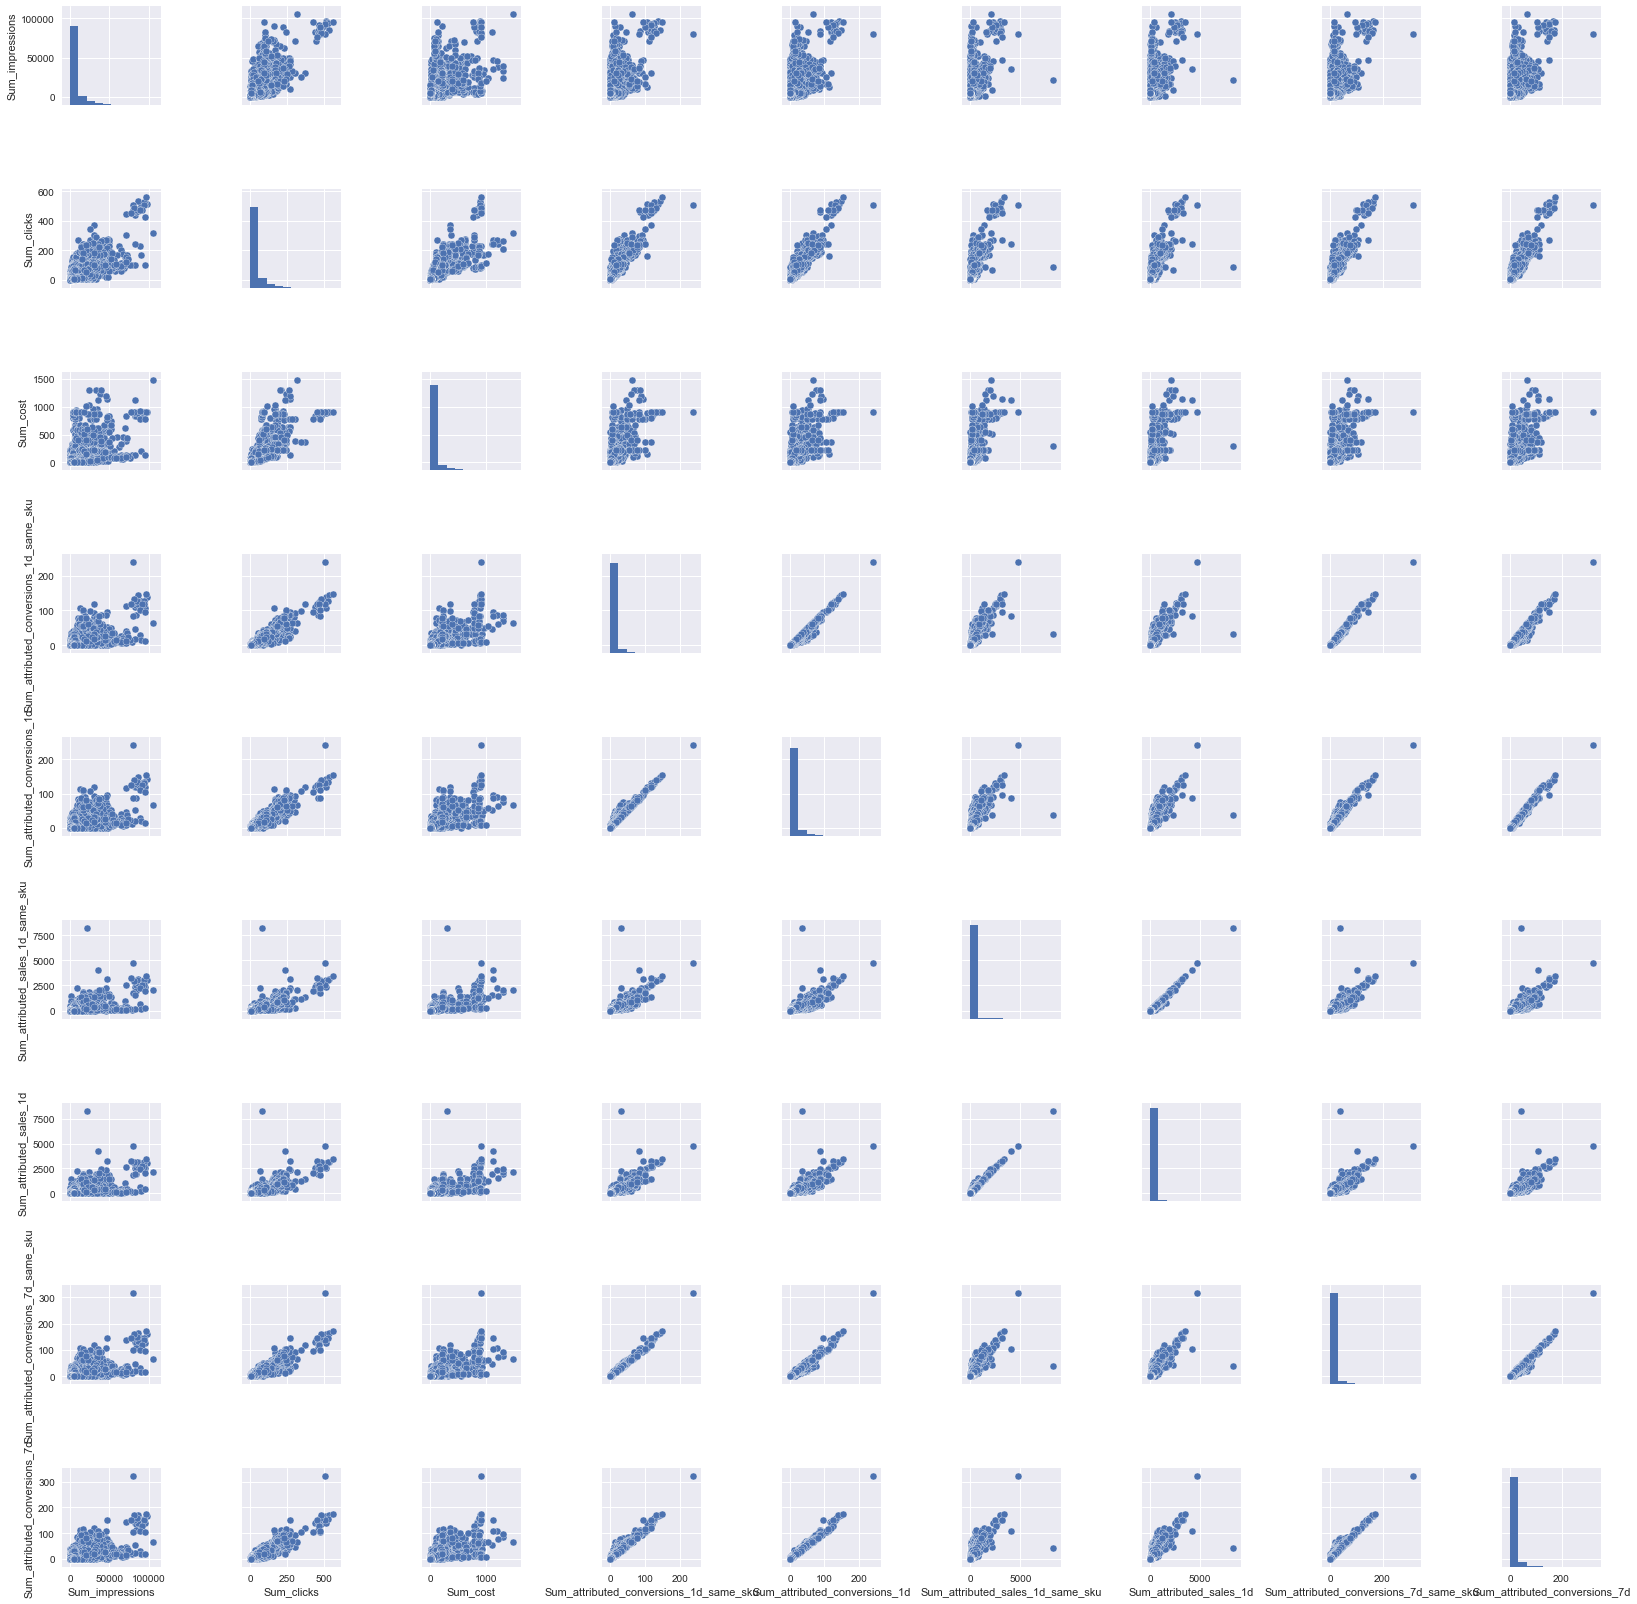

ValueError: max() arg is an empty sequence

In [115]:
#scatterplot
sns.set()
cols = ['Sum_impressions', 'Sum_clicks', 'Sum_cost',
       'Sum_attributed_conversions_1d_same_sku',
       'Sum_attributed_conversions_1d', 'Sum_attributed_sales_1d_same_sku',
       'Sum_attributed_sales_1d', 'Sum_attributed_conversions_7d_same_sku',
       'Sum_attributed_conversions_7d', ]
sns.pairplot(Campaign[cols], size = 2.5)
plt.show();
plt.tight_layout()

## 4.2 Creating (Feature Engineering)

#### combining

#### clusters

#### binning

## 4.3 Converting (Format Transformations) 

#### Change To correct Datatypes

In [101]:
pd.DataFrame(Campaign.dtypes)

,0
Budget_campaign_id,float64
Budget_report_date,object
Budget_campaign_status,object
Daily_budget_amount,int64
Bid_campaign_id,float64
Bid_report_date,object
Total_bid_amount,float64
AMS_campaign_id,float64
AMS_report_date,object
Sum_impressions,float64


In [167]:
# Change to String
Campaign['Budget_campaign_id']= Campaign['Budget_campaign_id'].astype(str)
Campaign['Bid_campaign_id']= Campaign['Bid_campaign_id'].astype(str)
Campaign['AMS_campaign_id']= Campaign['AMS_campaign_id'].astype(str)

#### Dummy Variables

In [169]:
Campaign.drop(['Budget_campaign_id', 'Bid_campaign_id', 'Bid_report_date',
              'AMS_campaign_id', 'AMS_report_date'], axis=1, inplace=True)

In [170]:
# CONVERT: convert objects to category using Label Encoder for train and test/validation dataset

# code categorical data
label = LabelEncoder()
Campaign['Budget_campaign_status'] = label.fit_transform(Campaign['Budget_campaign_status'])
Campaign['Budget_report_date'] = label.fit_transform(Campaign['Budget_report_date'])

In [171]:
# use the 'drop_first' parameter (new in pandas 0.18) to drop the first dummy variable for each feature
Campaign = pd.get_dummies(
    Campaign, columns=['Budget_report_date','Budget_campaign_status'], drop_first=True)

In [172]:
Campaign.head()

,Daily_budget_amount,Total_bid_amount,Sum_impressions,Sum_clicks,Sum_cost,Sum_attributed_conversions_1d_same_sku,Sum_attributed_conversions_1d,Sum_attributed_sales_1d_same_sku,Sum_attributed_sales_1d,Sum_attributed_conversions_7d_same_sku,...,Sum_attributed_conversions_30d_same_sku,Sum_attributed_conversions_30d,Sum_attributed_sales_30d_same_sku,Sum_attributed_sales_30d,Budget_report_date_1,Budget_report_date_2,Budget_campaign_status_1,Budget_campaign_status_2,Budget_campaign_status_3,Budget_campaign_status_4
30,24,1250.0,974.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
31,24,1250.0,1523.0,6.0,8.0,1.0,1.0,15.0,15.0,1.0,...,1.0,1.0,15.0,15.0,0,0,0,0,1,0
32,24,1250.0,3250.0,7.0,14.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,0,0,1,0
33,24,1250.0,1644.0,5.0,11.0,1.0,1.0,15.0,15.0,1.0,...,1.0,1.0,15.0,15.0,1,0,0,0,1,0
34,12,1250.0,1556.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0,1,1,0,0,0


#### Date variables

In [168]:
# Change to pandas datatime
Campaign['Budget_report_date'] = pd.to_datetime(Campaign.Budget_report_date)

#### Log Transformation 

In [ ]:
#histogram and normal probability plot
sns.distplot(train['<>'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['<>'], plot=plt)

In [ ]:
#applying log transformation
train['<>'] = np.log(train['<>'])

In [ ]:
#transformed histogram and normal probability plot
sns.distplot(train['<>'], fit=norm);
fig = plt.figure()
res = stats.probplot(train['<>'], plot=plt)

#### Normalization/Feature scaling

In [ ]:
#  Get a list of columns to normalize
columns_to_normalize = ['column1','column2','column3']

In [ ]:
# Apply Min Max normalization
train[columns_to_normalize] = train[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))

## 4.4 Feature selection (PCA, variance threshold)



#### PCA

Note: Perform PCA when you see coolinearity amongst dimensions in the dataset

PCA is effected by scale so you need to scale the features in your data before applying PCA. Use <b>StandardScaler</b> to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. source: https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60

In [ ]:
# only standardize dependent variables
x = StandardScaler().fit_transform(train) # data set minus the target

In [ ]:
# project PCA to 2D 
pca = PCA(n_components=2)

In [ ]:
principalComponents = pca.fit_transform(x)

In [ ]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [ ]:
finalDf = pd.concat([principalDf, train[['target']]], axis = 1)

In [ ]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('Principal Component 1', fontsize=15)
ax.set_ylabel('Principal Component 2', fontsize=15)
ax.set_title('2 Component PCA', fontsize=20)


targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets, colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
               finalDf.loc[indicesToKeep, 'principal component 2'], c=color, s=50)
ax.legend(targets)
ax.grid()

<b>Explained Variance¶</b>
The explained variance tells us how much information (variance) can be attributed to each of the principal components.

In [ ]:
pca.explained_variance_ratio_

Together, the first two principal components contain 95.80% of the information. The first principal component contains 72.77% of the variance and the second principal component contains 23.03% of the variance. The third and fourth principal component contained the rest of the variance of the dataset.

<b>What are the limitations of PCA?¶</b><br>
PCA is not scale invariant. check: we need to scale our data first.<br>
The directions with largest variance are assumed to be of the most interest<br>
Only considers orthogonal transformations (rotations) of the original variables<br>
PCA is only based on the mean vector and covariance matrix. Some distributions (multivariate normal) are characterized by this, but some are not.<br>
If the variables are correlated, PCA can achieve dimension reduction. If not, PCA just orders them according to their variances.

In [ ]:
# OR let PCA determine the number of components that will retain  95% of information
pca = PCA(.95)

#### Varience Threshold

#### Put Target variable in y

In [ ]:
y = train['<target>']

# Step 5: Build Model

## 5.00 Split Training and Testing Data

In [173]:
#We want to be able to determine cost given record of independent variables
y= Campaign.Sum_cost

In [174]:
y.shape

(6892,)

In [175]:
Campaign.shape

(6892, 23)

In [176]:
Campaign.drop('Sum_cost', axis=1, inplace=True)

In [177]:
# split train and test data with function defaults
X_train, X_test, y_train, y_test = train_test_split(Campaign, y, test_size=0.33, random_state=0)

## 5.10 Run Model

#### Initialization

##### Simple

 <b> Regression</b>

In [178]:
linreg = linear_model.LinearRegression()

In [179]:
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-5.78899709318
[  1.29787578e-01  -1.93487718e-03  -1.51021945e-03   2.51751882e+00
   3.34492138e+00  -8.06799133e+00  -1.89056154e-01   3.51412017e-01
  -1.93980046e+01   1.62138801e+01   1.24829480e+00  -9.30636687e-01
   1.85165927e+01  -1.57398464e+01  -1.29955630e+00   1.00388083e+00
  -9.73728275e+00  -5.29964267e+00   1.17448481e+01   1.84232645e+00
  -3.14974375e+00  -5.10290518e+01]


In [181]:
# make predictions on the testing set
y_pred = linreg.predict(X_test)

##### Advanced

In [ ]:
# Machine Learning Algorithm (MLA) Selection and Initialization
MLA = [
    # Ensemble Methods
    ensemble.AdaBoostRegressor(),
    ensemble.BaggingRegressor(),
    ensemble.ExtraTreesRegressor(),
    ensemble.GradientBoostingRegressor(),
    ensemble.RandomForestRegressor(),

    # Gaussian Processes
    gaussian_process.GaussianProcessRegressor(),

    # GLM
    linear_model.LinearRegression()


    # Trees
    tree.DecisionTreeRegressor(),
    tree.ExtraTreeRegressor(),

    # xgboost
    XGBRegressor()
]

In [187]:
# Let's try XGboost algorithm to see if we can get better results
xgb = XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)

In [188]:
xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.08, max_delta_step=0,
       max_depth=7, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=0.75)

In [190]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.933368493952


Our accuracy is changing between 79%-84%. I think it is close to an optimal solution.

#### Cross Validation

##### Simple

In [ ]:
cross_val_score(linear_model.LogisticRegressionCV(), train_data, y, scoring='accuracy')

##### Advanced

In [ ]:
# split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
# note: this is an alternative to train_test_split
# run model 10x with 60/30 split intentionally leaving out 10%
cv_split = model_selection.ShuffleSplit(
    n_splits=10, test_size=.3, train_size=.6, random_state=0)

# create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Train Accuracy Mean',
               'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']
MLA_compare = pd.DataFrame(columns=MLA_columns)

# create table to compare MLA predictions
MLA_predict = y

# index through MLA and save performance to table
row_index = 0
for alg in MLA:

    # set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    # score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(
        alg, X_train, y, cv=cv_split)

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index,
                    'MLA Train Accuracy Mean'] = cv_results['train_score'].mean()
    MLA_compare.loc[row_index,
                    'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    # if this is a non-bias random sample, then +/-3 standard deviations (std) from the mean, should statistically capture 99.7% of the subsets
    # let's know the worst that can happen!
    MLA_compare.loc[row_index,
                    'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std() * 3

    # save MLA predictions - see section 6 for usage
    alg.fit(X_train, y)
    MLA_predict[MLA_name] = alg.predict(X_test)

    row_index += 1


# print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by=['MLA Test Accuracy Mean'],
                        ascending=False, inplace=True)
MLA_compare
# MLA_predict

#### Plot Accuracy

##### Simple

##### Advanced

In [ ]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test Accuracy Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm Accuracy Score \n')
plt.xlabel('Accuracy Score (%)')
plt.ylabel('Algorithm')

## 5.11 Evaluate Model Performance
Determine a Baseline Accuracy 

#### For Linear Regression

In [182]:
# calculate MAE using scikit-learn
print(metrics.mean_absolute_error(y_test, y_pred))

26.3890024684


In [183]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_pred))

4987.67264156


In [184]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

70.6234567375


 72%  Accuracy could be due to several highly correlated variables.

In [185]:
# Calculate Rsquared
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.72149085296545024

In [191]:
print(explained_variance_score(y_pred,y_test))

0.681623381233


Our accuracy is 68%. I think it is close to an optimal solution.

#### For XGBoost

In [192]:
# Calculate Rsquared
from sklearn.metrics import r2_score
r2_score(y_test, predictions)

0.93674287392871602

In [190]:
from sklearn.metrics import explained_variance_score
predictions = xgb.predict(X_test)
print(explained_variance_score(predictions,y_test))

0.933368493952


Our accuracy is changing between 68%-93%. I think it is close to an optimal solution.

## 5.12 Tune Model with Hyper-Parameters
We will tune our model using [ParameterGrid](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ParameterGrid.html#sklearn.model_selection.ParameterGrid), [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html#sklearn.model_selection.GridSearchCV), and customized [sklearn scoring](http://scikit-learn.org/stable/modules/model_evaluation.html); [click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/). We will then visualize our tree with [graphviz](http://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html#sklearn.tree.export_graphviz). [Click here to learn more about ROC_AUC scores](http://www.dataschool.io/roc-curves-and-auc-explained/).


## 5.13 Tune Model with Feature Selection
As stated in the beginning, more predictor variables do not make a better model, but the right predictors do. So another step in data modeling is feature selection. [Sklearn](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.feature_selection) has several options, we will use [recursive feature elimination (RFE) with cross validation (CV)](http://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFECV.html#sklearn.feature_selection.RFECV).

# Step 6: Validate and Implement 

# Step 7: Conclusion and Strategies

## Conclusion

Model choice is the simplest question to answer. Data transformation, cleaning, augmentation and engineering has the greatest impact on model accuracy. 

<b>Steps to make model better</b><br>
Better understanding of the relationship between tables. <br>
Larger more diverse dataset<br>

<b>Advantages of different regression models.</b><br>
Start simple with linear regression works for most applications<br>
If we are underfitting employ more advanced ML algorithms like XGboost or Ensemble learners that are resiliant to overfitting<br>
